# Visualization with Hierarchical Clustering and t-SNE

Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

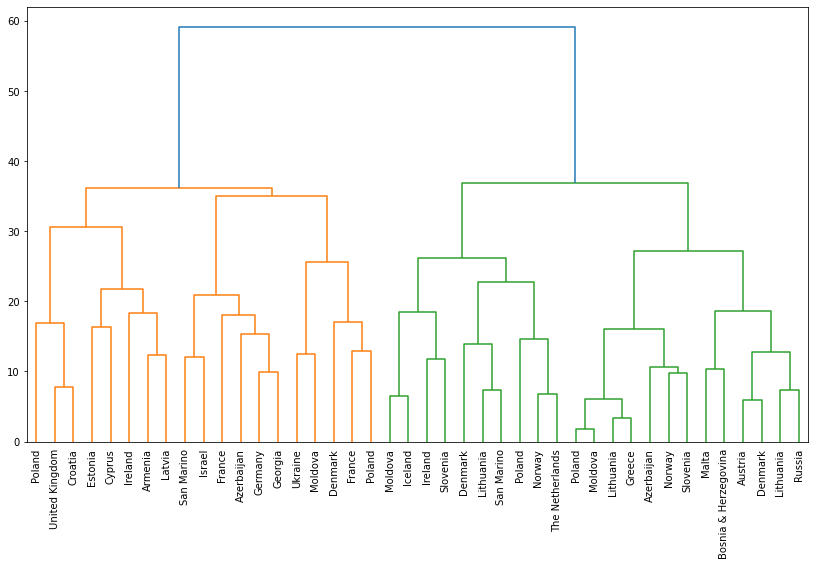

In [2]:
eurovision = pd.read_csv('../Data/eurovision-2016.csv')
eurovision = eurovision.sample(n=42, random_state=42)
eurovision1 = eurovision.drop(columns = ['From country', 'To country', 'Jury Points', 'Televote Points'], axis=1)

samples = np.array(eurovision1)
country_names = eurovision['From country'].tolist()

mergings = linkage(samples, method='complete')
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(mergings, 
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           ax=ax
           )
plt.show()

## Hierarchical clustering of the grain data
The SciPy linkage() function performs hierarchical clustering on an array of samples. 

Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [3]:
samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])


varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

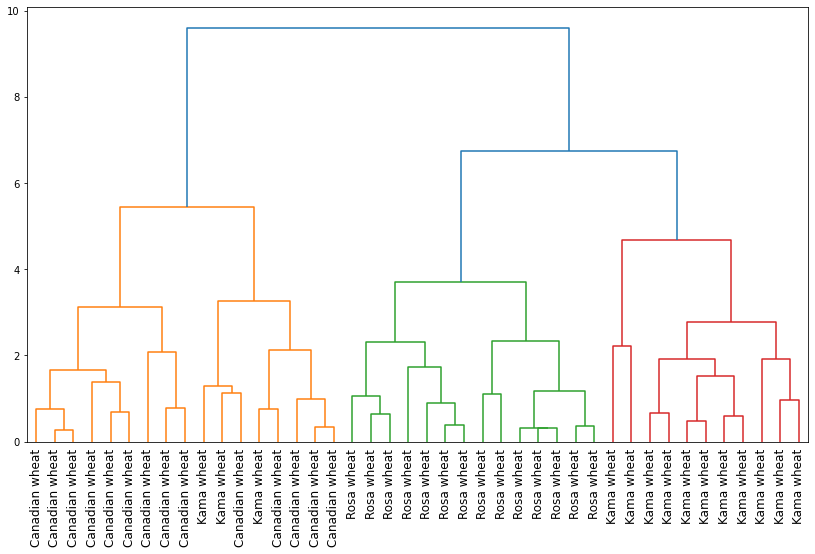

In [4]:
mergings = linkage(samples, method='complete')

fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=12, ax=ax)
plt.show()

## Hierarchies of stocks
Perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. 

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

In [5]:
stock = pd.read_csv('../Data/company-stock-movements-2010-2015-incl.csv')
print(stock.shape)
stock.head()

(60, 964)


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [6]:
stocks = stock.drop('Unnamed: 0', axis=1)
movements = np.array(stocks)
companies = stock['Unnamed: 0'].tolist()

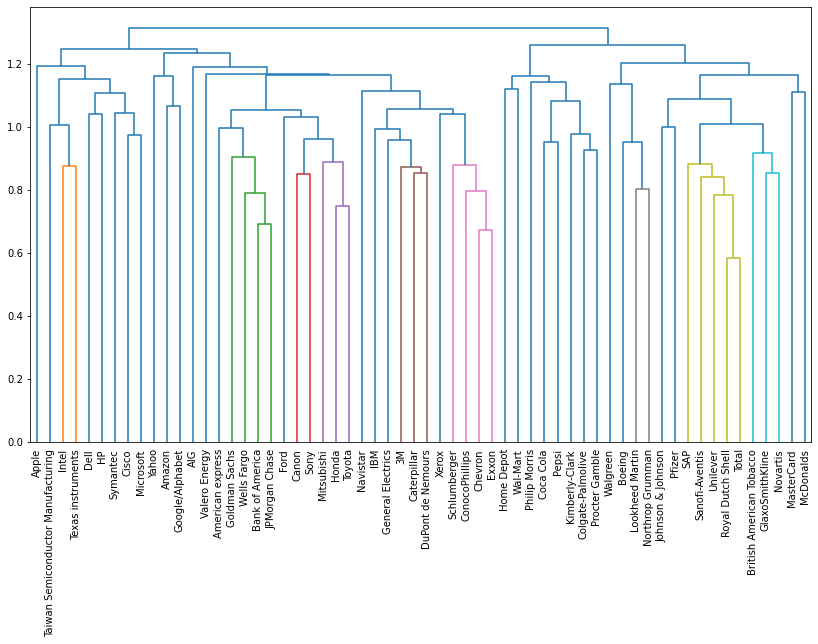

In [7]:
# Rescale the price movements for each stock by using the normalize() function on movements
normalized_movements = normalize(movements)

# Calculate the hierarchical clustering. linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(mergings, labels = companies, leaf_rotation=90, leaf_font_size=10, ax=ax)
plt.show()

# Cluster labels in hierarchical clustering

Hierarchical clustering is not only a visualization tool. We can also extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. The y-axis of the dendrogram encodes the distance between merging clusters. 

 linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

## Different linkage, different hierarchical clustering!

Perform a hierarchical clustering of the voting countries with 'single' linkage, and check the resulting dendrogram. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

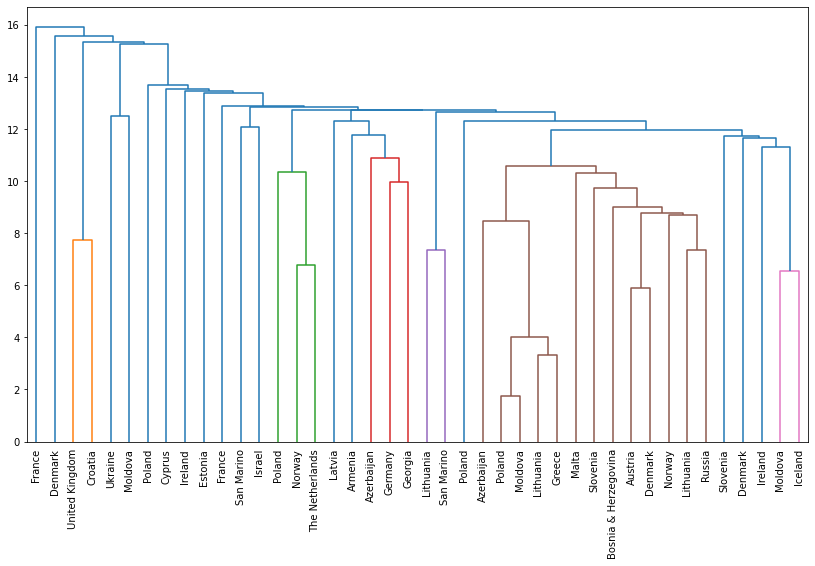

In [8]:
eurovision = pd.read_csv('../Data/eurovision-2016.csv')
eurovision = eurovision.sample(n=42, random_state=42)
eurovision1 = eurovision.drop(columns = ['From country', 'To country', 'Jury Points', 'Televote Points'], axis=1)

samples = np.array(eurovision1)
country_names = eurovision['From country'].tolist()

mergings = linkage(samples, method='single')
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(mergings, 
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           ax=ax
           )
plt.show()

## Extracting the cluster labels
We found the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [9]:
samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])


varieties = ['Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat',
             'Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat',
             'Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat',
             'Rosa wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat',
             'Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat',
             'Canadian wheat']

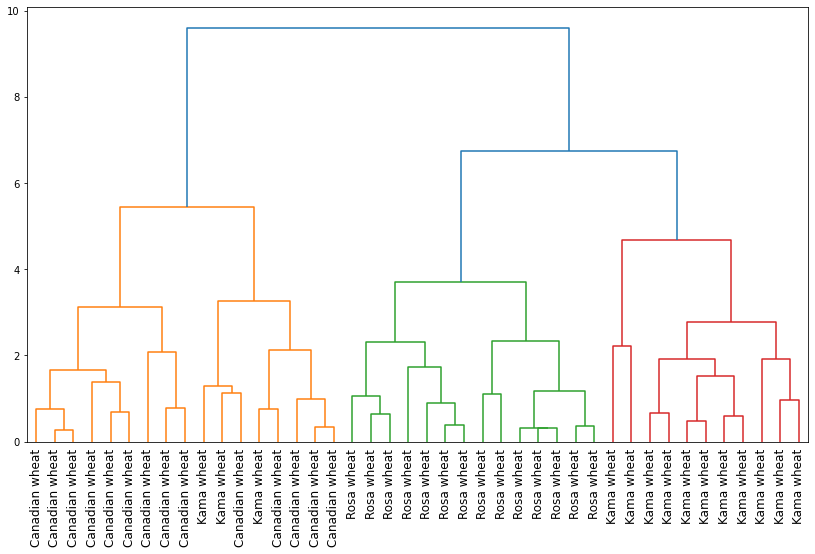

In [10]:
mergings = linkage(samples, method='complete')

fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=12, ax=ax)
plt.show()

In [11]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab to count the number of times each grain variety coincides with each cluster label.
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


# t-SNE for 2-dimensional maps

t-SNE stands for "t-distributed stochastic neighbor embedding". It has a complicated name, but it serves a very simple purpose. It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components you've already met. 

t-SNE only has a fit_transform method. As you might expect, the fit_transform method simultaneously fits the model and transforms the data. However, t-SNE does not have separate fit and transform methods. This means that you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.

The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.

The axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data. 

## t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

In [12]:
grains = pd.read_csv('../Data/seeds_dataset.csv')
samples = np.array(grains)

variety_numbers = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                   2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                   3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]



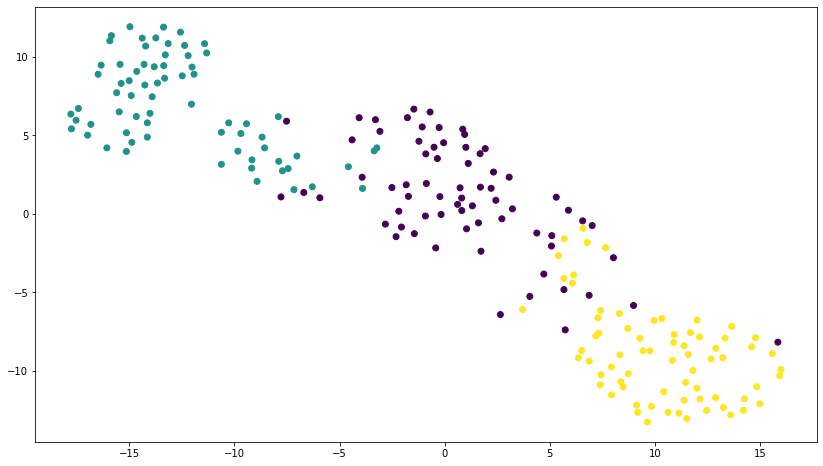

In [13]:
# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(xs, ys, c =variety_numbers)
plt.show()


## A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. Apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

In [14]:
stock = pd.read_csv('../Data/company-stock-movements-2010-2015-incl.csv')

stocks = stock.drop('Unnamed: 0', axis=1)
movements = np.array(stocks)

companies = stock['Unnamed: 0'].tolist()
normalized_movements = normalize(movements)

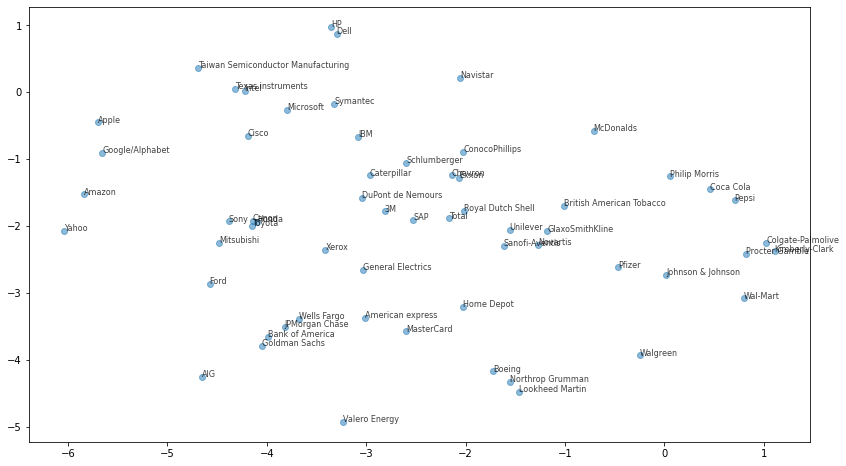

In [15]:
# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()
